
<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>
# Aprendizagem não supervisionada

## Eduardo Pécora, Ph.D.

## K-Means Clustering

### Objetivos:

* Introduzir o conceito de aprendizagem não supervisionada
* Aprender a usar o algoritmo do Kmeans do Scikit-learn


In [ ]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

np.random.seed(65876)

## Coletar os dados

In [ ]:
X = pd.read_csv("https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/cluster_data.csv", sep="\t")
X.head()

,x,y
0,-5.470357,6.567679
1,-0.437412,2.034206
2,-0.842431,-0.074775
3,3.299763,-4.639278
4,7.802927,0.088883


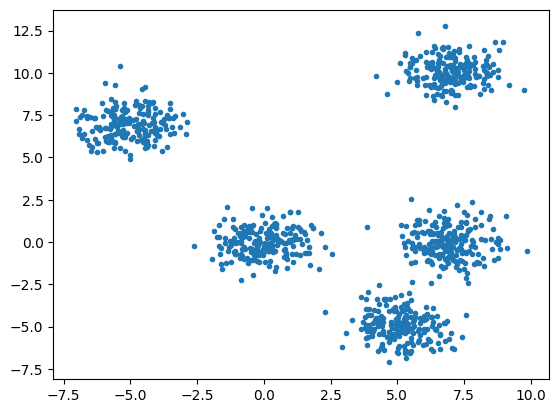

In [ ]:
plt.scatter(X["x"], X["y"], marker='.')

## K-Means

Nós Usaremos 3 parâmetros para o KMeans:

* init: k-means++ - Seleção automática nos centróides iniciais
* n_clusters: 5 Número de CLusters
* n_init: 30 quantas reinicializações com diferentes centróides

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 30)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=2, n_init=30)

In [ ]:
k_means_labels = k_means.labels_

X_plot = X.copy()
X_plot["k_means_labels"] = k_means_labels
X_plot.head()


,x,y,k_means_labels
0,-5.470357,6.567679,1
1,-0.437412,2.034206,0
2,-0.842431,-0.074775,0
3,3.299763,-4.639278,0
4,7.802927,0.088883,0


In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.01199643, -1.6725895 ],
       [ 0.96000268,  8.50560798]])

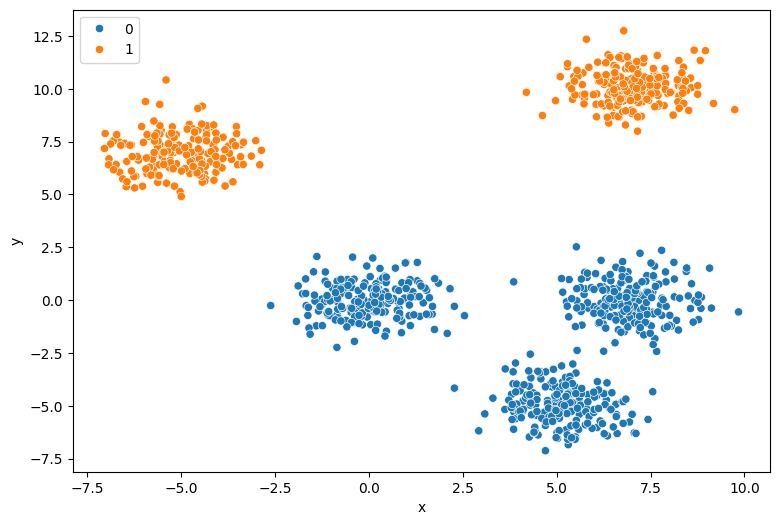

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=X_plot, x="x", y="y",hue="k_means_labels", palette = "tab10")
plt.legend()
plt.show()

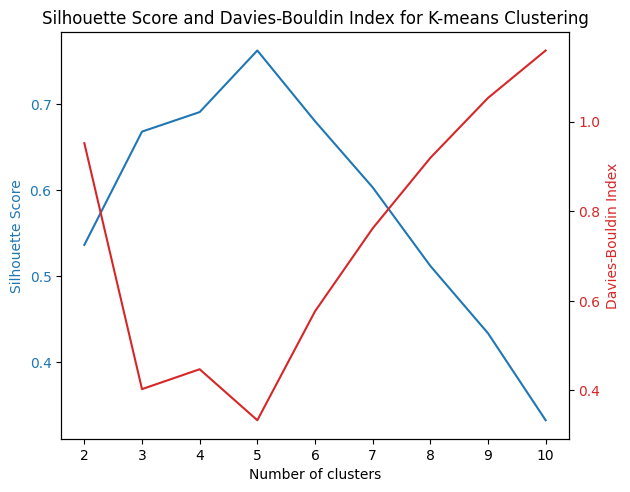

The optimal number of clusters according to the Silhouette score is: 5
The optimal number of clusters according to the Davies-Bouldin index is: 5


In [ ]:
# Range of clusters to try
cluster_range = range(2, 11)

# Lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_indices = []

# Perform K-means and compute metrics for each number of clusters
for k in cluster_range:
    kmeans = KMeans(init = "k-means++",n_clusters=k, n_init = 30, random_state=42)
    labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin_avg = davies_bouldin_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_indices.append(davies_bouldin_avg)

# Plot the evaluation metrics
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette Score', color='tab:blue')
ax1.plot(cluster_range, silhouette_scores, label='Silhouette Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Davies-Bouldin Index', color='tab:red')
ax2.plot(cluster_range, davies_bouldin_indices, label='Davies-Bouldin Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Silhouette Score and Davies-Bouldin Index for K-means Clustering')
plt.show()

# Find the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters according to the Silhouette score is: {optimal_clusters}')
optimal_clusters_db = cluster_range[np.argmin(davies_bouldin_indices)]
print(f'The optimal number of clusters according to the Davies-Bouldin index is: {optimal_clusters_db}')

## Fique Conectado

- [![YouTube](https://img.icons8.com/?size=40&id=19318&format=png&color=000000)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/?size=40&id=13930&format=png&color=000000)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/?size=40&id=32323&format=png&color=000000)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!
  
  ## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>


## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 07-11-2024       | 1.0     | Eduardo Pecora | Inicial               |

<hr>

## <h3 align="center"> (c) Liga Data Science/ UFPR 2024. All rights reserved. <h3/>